In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder,normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential 
from keras.layers import Dense,BatchNormalization, Dropout
from sklearn import metrics

import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [ ]:


labels = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']

# Dataset used here is the combination iof NSL-KDD train and test text files
# using pandas to read the file from Google Drive

pds = pd.read_csv("/content/drive/My Drive/RM3/KDDTotal.txt", 
                       dtype= str, 
                       encoding= "utf-8")

# setting feature columns using pandas
pds.columns = labels 

# Encoding target label into anomaly or normal data
for i in range(0,len(pds)):
  if pds[ 'attack_type'][i] != "normal":
    pds['attack_type'][i] = "anomaly"




In [ ]:
#dropping column difficulty_level which is not required for modeling

dataframe = pds.drop('difficulty_level', 1)

In [ ]:

max(dataframe['attack_type'])

'normal'

In [ ]:

le = LabelEncoder()

# Encoding categeroical feature columns

print("Attack Vectors:", set(list(dataframe['attack_type']))) # use print to make it print on single line 
dataframe['attack_type'] = le.fit_transform(dataframe['attack_type'])
dataframe['protocol_type'] = le.fit_transform(dataframe['protocol_type'])
dataframe['service'] = le.fit_transform(dataframe['service'])
dataframe['flag'] = le.fit_transform(dataframe['flag'])

print('\nDescribing attack_type: ')
# print("min", dataframe['attack_type'].min())
print("the normal label is encoded into:", dataframe['attack_type'].max())
# print("mode",dataframe['attack_type'].mode())



Attack Vectors: {'normal', 'anomaly'}

Describing attack_type: 
min 0
the normal label is encoded into: 1
mode 0    1
dtype: int64


In [ ]:
# Now seperating x(features), y(target) from dataframe

data_x = dataframe.drop('attack_type', axis=1)
data_y = dataframe.loc[:,['attack_type']]



# Split train and test data

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, shuffle= False, test_size=.2, random_state=42) # TODO

# Normalizing features

X_train = pd.DataFrame(normalize(X_train))
X_test = pd.DataFrame(normalize(X_test)) 

In [ ]:
# A Sequential model with 5 layers and epochs as parameters

def clas_Sequential_plot( n1 , n2, n3, n4, epoch, lr):
  
  # Naming and creating Tensorboard graph for model 
  opt = keras.optimizers.adam(learning_rate= lr)
  name = "kdd-seqNN-{}".format(int(time.time()))
  tensorboard = TensorBoard(log_dir="/content/drive/My Drive/RM3/tensorboard results/{}".format(name))
  print("using optimizer:", opt, "with learning rate:", lr)
  
  # This is the model with 41 input dimensions(features)
  classifier = Sequential()
  classifier.add(Dense(units=n1, activation= 'relu', input_dim =41 ))
  
  classifier.add(Dropout(0.1))
  # classifier.add(BatchNormalization())
  classifier.add(Dense(units=n2, activation= 'relu'))
  
  classifier.add(Dropout(0.1))
 
  classifier.add(Dense(units=n3, activation= 'relu'))
  # classifier.add(Dropout(0.1))

  classifier.add(Dense(units=n4, activation= 'relu'))
  
  
  classifier.add(Dense(units=1, activation= 'sigmoid'))

  earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min', patience=2)
  
  classifier.compile(optimizer=opt, metrics=['accuracy'], loss = 'binary_crossentropy')
  history = classifier.fit(X_train, y_train, batch_size=256, validation_split=0.1, epochs = epoch, 
                           callbacks=[tensorboard, earlystop ])
                                                                                                                                        

  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  #######################
  y_pred = classifier.predict(X_test)
  y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]


  score = metrics.accuracy_score(y_test, y_pred)
  print("Score of model on new data:", score)
  return classifier.summary()

using optimizer: <keras.optimizers.Adam object at 0x7fc91943c160> with learning rate: 0.001
Train on 106930 samples, validate on 11882 samples
Epoch 1/100
106930/106930 [==============================] - 4s 39us/step - loss: 0.1194 - accuracy: 0.9571 - val_loss: 0.0687 - val_accuracy: 0.9750
Epoch 2/100
106930/106930 [==============================] - 2s 21us/step - loss: 0.0627 - accuracy: 0.9774 - val_loss: 0.0537 - val_accuracy: 0.9816
Epoch 3/100
106930/106930 [==============================] - 2s 20us/step - loss: 0.0479 - accuracy: 0.9842 - val_loss: 0.0411 - val_accuracy: 0.9878
Epoch 4/100
106930/106930 [==============================] - 2s 21us/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0340 - val_accuracy: 0.9887
Epoch 5/100
106930/106930 [==============================] - 2s 20us/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0316 - val_accuracy: 0.9905
Epoch 6/100
106930/106930 [==============================] - 2s 21us/step - loss: 0.0329 - accuracy: 0.9898

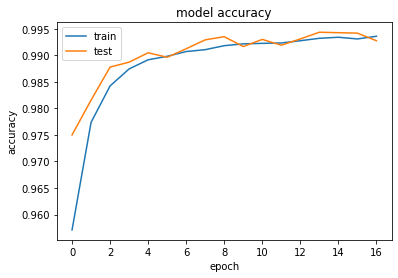

Score of model on new data: 0.841570158901158
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               10752     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 

In [ ]:
clas_Sequential_plot(256,256, 128,64,100, 0.001)